In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.stats import norm 
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import folium      #  folium libraries
from   folium.plugins import MarkerCluster
import os
print(os.listdir("../input"))
import datetime
%matplotlib inline


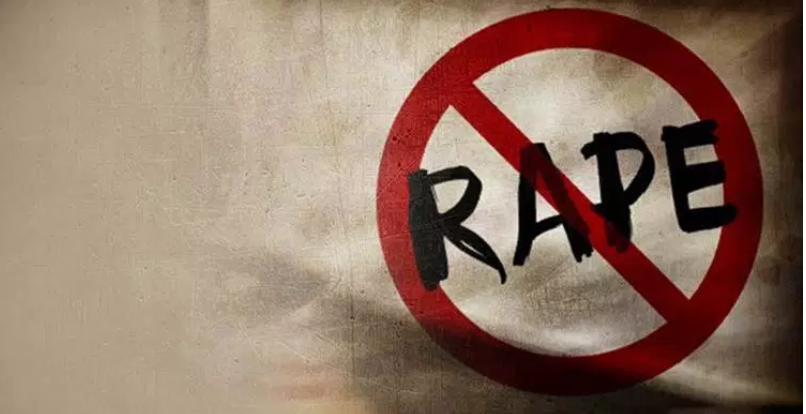

In [ ]:
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# init_notebook_mode(connected=False)
# # import chart_studio.plotly
# import cufflinks as cf
# cf.go_offline()

# PLOTLY NOT WORKING IN KAGGLE !!  :( :(  
# So, commenting it out and the code of world geogrphay created using it :( :( 

I've seen many media reports and movies based upon crime in India. So, when I stumbled upon this dataset in kaggle, I thought of doing an EDA on it. And as an Indian, I've many unanswered questions on crime.

This case study only limits to "Rapes in India". Why?

Well, because of the media attention (both national and international, even the likes of nytimes.com and bbc.com) to this crime from the spate of other crimes that occur in India. This has built a bias about India across the globe. There is even a wiki page on Rape in India (https://en.wikipedia.org/wiki/Rape_in_India).

So,
* Is Indian society really so pathetic and is made of so sick people ? 
* Can we quantify this claim ?
* Can we zero-in those areas which are dangerous for women ?
* How has the decade of 2000 fared in case of crime of rape vs other serious offences in India ?
* How does India stand across the globe on this crime ?
* And has anything changed in India, post Nirbhaya ?

So, let's start with reading data of Rape victims.

In [ ]:
# Any results you write to the current directory are saved as output.
# victims of rape DataFrame
rape_victim = pd.read_csv('../input/crime-in-india/20_Victims_of_rape.csv',na_filter = 'False')
rape_victims_2016 = pd.read_csv('../input/2016crimedata/Rape_Victims_Table_3A.3_2016.csv',na_filter = 'False',encoding = 'unicode_escape') # data has utf8 characters

# let's see how the data is structured
rape_victim.sample(5).style.set_table_styles(
[{'selector': 'tr:hover',
  'props': [('background-color', 'yellow')]}]
)

> Above is the peek into the "victims of Rape in India from 2001 - 2010" government data. This is gender neutral data.

In [ ]:
rape_victims_2016.sample(5).style.set_table_styles(
[{'selector': 'tr:hover',
  'props': [('background-color', 'yellow')]}]
)

** Above is the most recent government released data on the same. Today, it is 2019, while above is 2016 data.

**Important**

I've distributed this study in two sections for a slew of reasons -
Before Nirbhaya incident (BN) - Data from 2000 decade which is until 2010.
Post Nirbhaya incident (PN) - Data of the year 2016. 

So, initially the historical data (BN) is worked upon. Thereafter, I study the (PN) data and check if India really changed post the horrific Nirbhaya incident ? If it changed, then in how and how much ?

<a>** 1. Before Nirbhaya - DATA SET UNDERSTANDING ** </a>

This data set has data for each state and UT of India.
The data takes into consideration total cases of rapes in the first row. Then, this is sub divided into two different sub-groups. "Incest" and "Other forms of Rape". Incest cases have a specific row, while other all cases come other the next row. 

Thus, the total no. of cases = incest case + other types of cases.

Now, let's check the metadata of the data set - 

In [ ]:
rape_victim.columns

The data set does not have columns such as date on which crime was committed, exact area in latitude and longitude to further pin point the location of crime, or the date/time on which crime was reported, status of investigation, final status of crime conviction, etc.

Had such columns been present, seasonality factor could have be calculated. For example, if date, time and geographical factors were present, then analysis could drill down better. As a background information, its widely known that in rural India where in open defecation is still a practise, sexual violence is inter-linked (https://www.bbc.com/news/world-asia-india-27635363). Similarly, rainy season, late nights or seculeded afternoon hours, weekend/ festive holidays, are few of the time slots which see spike in occurance of crime as per studies over the web. But this dataset does not provide such input columns to further reasearch on such factors.

Moving on, lets do basic data cleansing -

In [ ]:
rape_victim.fillna('')
rape_victim.isnull().sum().sum()

YAY ! No NULLs in data !


Now, lets consider only the sub group of "Total Rape Victims" for each state and UT of India for further analysis. This will give the holistic picture.

In [ ]:
total_rape = rape_victim[rape_victim['Subgroup'] == 'Total Rape Victims']
cp_rape_victim = rape_victim.copy()

Summary of the new working dataframe 

<a> ** 2. STARTING OF BASIC EDA ** </a>

In [ ]:
total_rape.describe().style.set_table_styles(
[{'selector': 'tr:hover',
  'props': [('background-color', 'yellow')]}]
)

*Insights -*

* From the above, we can see that age group of victims between - 18-30 is most vulnerable. 
* Also, shocking is high victim count from 0-10 age indicating high incidence of sexual misconduct on innocent children. 

Let's understand how the data structure of table -

In [ ]:
total_rape.info()

Let's check how each Indian region (state + UT) reported rape cases over the decade -

In [ ]:
total_rape.Year = pd.to_datetime(total_rape['Year'], format ='%Y').dt.strftime('%Y')
total_rape.loc[:,'Total_Rape_per_Year'] = total_rape.groupby('Year')['Victims_of_Rape_Total'].transform('sum')
plot_total_rape  = total_rape.drop_duplicates('Year', keep = 'first', inplace = False)
#plot_total_rape.drop(['Area_Name'], axis = 1,inplace = False)
#plot_total_rape.columns
plot_total_rape.sample()

In [ ]:
# Creating a Countplot
plt.figure(figsize=(14,10))
#plot_total_rape.plot(legend=False)
x = plot_total_rape['Year']
y = plot_total_rape['Total_Rape_per_Year']
plt.plot(x,y)
plt.title('Number of rapes per year in all of India for the decade (2001 - 2010)',color = 'blue',fontsize=14)
plt.xlabel('Year')
plt.ylabel('Total_Rape_per_Year')
plt.grid(True)
plt.show()

There has been a consistent increase in rape case with the years 2002 and 2003 being a slight exception. So, as a society we are clearly not doing good!

In [ ]:
# Plotting Victims Juvenile vs Adults
#total_rape_minor = plot_total_area_rape['Victims_Upto_10_Yrs'].sum() + plot_total_area_rape['Victims_Between_10-14_Yrs'].sum() +plot_total_area_rape['Victims_Between_14-18_Yrs'].sum()
#total_rape_adults = plot_total_area_rape['Victims_Between_18-30_Yrs'].sum() + plot_total_area_rape['Victims_Between_30-50_Yrs'].sum() +plot_total_area_rape['Victims_Above_50_Yrs'].sum()

total_rape_minor = plot_total_rape['Victims_Upto_10_Yrs'].sum() + plot_total_rape['Victims_Between_10-14_Yrs'].sum() +plot_total_rape['Victims_Between_14-18_Yrs'].sum()
total_rape_adults = plot_total_rape['Victims_Between_18-30_Yrs'].sum() + plot_total_rape['Victims_Between_30-50_Yrs'].sum() +plot_total_rape['Victims_Above_50_Yrs'].sum()

data = [total_rape_minor,total_rape_adults ] 
index =['Adults Victims', 'Minor Victims']
data_df = pd.DataFrame(data, columns = ['age_level'], index = index)
#print(data)
plt.figure(figsize=(4,3), edgecolor='black')
ax = data_df.plot.bar(rot=0)
plt.title("Minor vs Adults - Victims",color = 'royalblue',fontsize=14)

*Insights -*
* Underage victim (Minor aged victims) indicates high child abuse. Almost 40% victims are below 18 years and minor.

<a> ** 3. STATE WISE CRIME DISTRIBUTION ** </a>


Now, lets see this area wise, how each state has fared. Do we see some anomolies in any area ?

Area wise calculation.

In [ ]:
cp_rape_victim.sample()
cp_total_rape = cp_rape_victim[rape_victim['Subgroup'] == 'Total Rape Victims']
cp_total_rape.Year = pd.to_datetime(cp_total_rape['Year'], format ='%Y').dt.strftime('%Y')
cp_total_rape.loc[:,'Total_Rape_per_Area'] = cp_total_rape.groupby('Area_Name')['Victims_of_Rape_Total'].transform('sum')
plot_total_area_rape = cp_total_rape.drop_duplicates('Area_Name')
#cp_total_rape

In [ ]:
# 2001 statistics 
population_2001 = pd.read_csv('../input/census2001/all.csv', na_filter = False)
population_2001.replace({
                'UP' : 'Uttar Pradesh',
                'TN' : 'Tamil Nadu',
                'MP' : 'Madhya Pradesh',
                'D_N_H' : 'Dadra & Nagar Haveli',
                'HP' : 'Himachal Pradesh',
                'WB' : 'West Bengal',
                'CG' : 'Chhattisgarh',
                'JK' : 'Jammu & Kashmir',
                'AN' : 'Andaman & Nicobar Islands',
                'D_D' : 'Daman & Diu'    
},inplace=True
)

population_2001.loc[:,'State_Popu'] = population_2001.groupby('State')['Persons'].transform('sum')

population_2001_cp = population_2001.drop_duplicates('State',keep = 'first')
population_2001_use = population_2001_cp[['State','State_Popu']]
population_2001_use.reset_index()
population_2001_use.loc[:,'Year'] = '2001'
population_2002 = population_2001_use.copy()

def rule(year, pop, df):
        df['Year'] = 'year'
        df['State_Popu'] = df['State_Popu'] * pop
        return df
year_map = {'2001': '2002', '2002': '2003' , '2003': '2004', '2004': '2005', '2005': '2006', '2006': '2007', '2007': '2008', '2008': '2009', '2009': '2010'   }

population_2002_use = population_2001_use.copy()
population_2002_use['Year'] = population_2001_use['Year'].map(year_map)
population_2002_use['State_Popu'] =  population_2002_use['State_Popu']*1.017  # India's population increase rate applied on each state.
population_2002_use.State_Popu = population_2002_use.State_Popu.astype(int)

population_2003_use = population_2002_use.copy()
population_2003_use['Year'] = population_2002_use['Year'].map(year_map)
population_2003_use['State_Popu'] = population_2002_use['State_Popu']* 1.017 # India's population increase rate applied on each state.
population_2003_use.State_Popu = population_2002_use.State_Popu.astype(int)


population_2004_use = population_2003_use.copy()
population_2004_use['Year'] = population_2003_use['Year'].map(year_map)
population_2004_use['State_Popu'] =  population_2003_use['State_Popu']*1.016  # India's population increase rate applied on each state.
population_2004_use.State_Popu = population_2003_use.State_Popu.astype(int)

population_2005_use = population_2004_use.copy()
population_2005_use['Year'] = population_2004_use['Year'].map(year_map)
population_2005_use['State_Popu'] = population_2004_use['State_Popu']* 1.016 # India's population increase rate applied on each state.
population_2005_use.State_Popu = population_2004_use.State_Popu.astype(int)

population_2006_use = population_2005_use.copy()
population_2006_use['Year'] = population_2005_use['Year'].map(year_map)
population_2006_use['State_Popu'] =  population_2005_use['State_Popu']*1.015  # India's population increase rate applied on each state.
population_2006_use.State_Popu = population_2005_use.State_Popu.astype(int)

population_2007_use = population_2006_use.copy()
population_2007_use['Year'] = population_2006_use['Year'].map(year_map)
population_2007_use['State_Popu'] = population_2006_use['State_Popu']* 1.015 # India's population increase rate applied on each state.
population_2007_use.State_Popu = population_2006_use.State_Popu.astype(int)


population_2008_use = population_2007_use.copy()
population_2008_use['Year'] = population_2007_use['Year'].map(year_map)
population_2008_use['State_Popu'] =  population_2007_use['State_Popu']*1.015  # India's population increase rate applied on each state.
population_2008_use.State_Popu = population_2007_use.State_Popu.astype(int)

population_2009_use = population_2008_use.copy()
population_2009_use['Year'] = population_2008_use['Year'].map(year_map)
population_2009_use['State_Popu'] = population_2008_use['State_Popu']* 1.014 # India's population increase rate applied on each state.
population_2009_use.State_Popu = population_2008_use.State_Popu.astype(int)

population_2010_use = population_2009_use.copy()
population_2010_use['Year'] = population_2009_use['Year'].map(year_map)
population_2010_use['State_Popu'] = population_2009_use['State_Popu']* 1.014 # India's population increase rate applied on each state.
population_2010_use.State_Popu = population_2009_use.State_Popu.astype(int)


population_2000_decade_use = [population_2001_use, population_2002_use, population_2003_use, population_2004_use, population_2005_use, population_2006_use , population_2007_use, population_2008_use, population_2009_use, population_2010_use  ]

population_2000_decade = pd.concat(population_2000_decade_use)

population_2000_decade.sample(5)


merge_total_rape = pd.merge(population_2000_decade,cp_total_rape, left_on = ['State', 'Year'], right_on= ['Area_Name', 'Year'] , how = 'inner' )
merge_total_rape.sample(5)
merge_total_rape.loc[:,'Victim_vs_Population'] =  merge_total_rape['Total_Rape_per_Area']/merge_total_rape['State_Popu']
merge_total_rape.sample()

Peek into the merged Dataframe above. New columns added are - Area wise Rapes in India in the decade (Total_Rape_per_Area) and denisity of rape as per area population (Victim_vs_Population)

In [ ]:
# heat map plotting 

in_data2 = total_rape.pivot("Area_Name","Year","Victims_of_Rape_Total" )

plt.figure(figsize=(14, 10)) 

plt.yticks(rotation=1) 
ax = sns.heatmap(in_data2,cmap="YlGnBu", linewidths=.5)
plt.title("State wise Count Distribution of Crime Rape",color = 'blue',fontsize=14)

*Insights -*

* States of "Madhya Pradesh, Maharashtra, Uttar Pradesh, Assam, Bihar and West Bengal" were most impacted during this period. While Madhya Pradesh didnt improve its law and order situation, West Bengal situation went from bad to worse the most.
* Situation in states of "Odisha, Tamil Nadu, Punjab, Jharkhand, Chhattisgarh and Andhra Pradesh" worsend during this period.
* Baring state of Assam, other North Eastern states don't report Rape related crime in excess.
* The states like Bihar and UP have in-consistent graph in cases of rape. Few years it improved while few years it was really dark times.

In [ ]:
# heat map plotting 

in_data3 = merge_total_rape.pivot("Area_Name","Year","Victim_vs_Population" )

plt.figure(figsize=(14, 10)) 

plt.yticks(rotation=1) 
ax = sns.heatmap(in_data3,cmap="YlGnBu", linewidths=.5)
plt.title("State wise Distribution of Crime Rape as per Population",color = 'blue',fontsize=14)

*Insights -*

* As per population, density of crime is more in states of "Mizoram, Tripura, Delhi, Madhya Pradesh, Chhattishgarh and Assam, with Mizoram being the worst of all. This is somewhat strange to the earlier heat map where North Eastern states of Mizoram and Tripura were not identified.
* State which is most impacted is ( count & density) - Madhya Pradesh.
* Change in a state's population did not impact the crime data over the years.

> <a>** 4. RELATIONSHIP OF VICTIM WITH OFFENDER ** </a>

Now, let's check out how the victims and offenders are related. This will help to understand if offenders are insiders or outsiders.

In [ ]:
rape_offender = pd.read_csv('../input/21-offenders-known-to-the-victimcsv/21_Offenders_known_to_the_victim.csv',na_filter = 'False')
rape_offender.head()
rape_offender.fillna('')
rape_offender.Year = pd.to_datetime(rape_offender['Year'], format ='%Y').dt.strftime('%Y')
rape_offender.isnull().sum().sum()

After initial data cleansing, lets join the two dataframe based on "Area_Name" and "Year". Thereafter, calculate percentage in an additional column. Once done, lets see visualize the percentage and see the overall impact.


P.S. - Not all "Area_Names" are present in this data set which are present in previous dataset. This suggests that this aspect is either absent in those areas or not captured by government agency collecting this data set. So, such 7 rows are deleted.

In [ ]:
joined_df = pd.merge(rape_offender, total_rape, on = ['Area_Name', 'Year'], how = 'inner'  )
joined_df['Known_to_Offender_Percent'] = joined_df.No_of_Cases_in_which_offenders_were_known_to_the_Victims/ joined_df.Rape_Cases_Reported
joined_df.replace([np.inf, -np.inf], np.nan)
joined_df  = joined_df.dropna(axis=0, subset = ['Known_to_Offender_Percent'])
joined_df.isnull().sum().sum()

In [ ]:
joined_df1 = joined_df[['Area_Name', 'Year','No_of_Cases_in_which_offenders_were_known_to_the_Victims', 'Rape_Cases_Reported']].copy()

joined_df2 = joined_df1.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

joined_df2['Sum_known_offenders'] = joined_df2.groupby('Year')['No_of_Cases_in_which_offenders_were_known_to_the_Victims'].transform('sum')
joined_df2['Sum_total_rapes'] = joined_df2.groupby('Year')['Rape_Cases_Reported'].transform('sum')
plot_joined_df2 = joined_df2.drop_duplicates('Year', keep = 'first', inplace = False)
plot_joined_df2 = plot_joined_df2.sort_values('Year')

In [ ]:
#plot based group by on Year
fig, ax = plt.subplots(figsize=(14,10))
sns.lineplot(x=plot_joined_df2.Year, 
             y=plot_joined_df2.Sum_total_rapes, 
             color='royalblue',
             ax=ax) 

sns.lineplot(x=plot_joined_df2.Year, 
             y=plot_joined_df2.Sum_known_offenders,
             color='seagreen',
             ax=ax)
   
ax.legend(['total_rapes' , 'offenders_known'], facecolor='y')
ax.set(ylim=(1000, 25000))

plt.grid(True)
plt.title("How Often Victims and Offenders are Related",color = 'blue',fontsize=14)
plt.show()

*Insights -*

* Barring the year 2006, its clearly visible that pan India, usually the victim is raped by a person known to them - be it parent/ close family member, other relative, neighbour or other known persons (these are the known sub-sections in the input dataset as individual columns).
* This also concurs to the point made by the then Delhi Police Chief (Mr. Neeraj Kumar) post infamous Dec 2012 Delhi rape case, in a televised media interview claiming that most of the rapes happen by a known person in India, thus boasting the effectiveness of his police force. And the heinous crime of raping an unknown lady on streets of Delhi is not a norm rather an exception. ( I could not find the link of the video othersie would have posted it here too.)

P.S. - This can be further explored how other crimes happen on women across India to evaluate the overall safety of women. This is explored in Section 6 Below.

In [ ]:
joined_df3 = joined_df1.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
joined_df3['Sum_known_offenders'] = joined_df3.groupby('Area_Name')['No_of_Cases_in_which_offenders_were_known_to_the_Victims'].transform('sum')
joined_df3['Sum_total_rapes'] = joined_df3.groupby('Area_Name')['Rape_Cases_Reported'].transform('sum')

plot_joined_df3 = joined_df3.drop_duplicates('Area_Name', keep = 'first', inplace = False)
plot_joined_df3 = plot_joined_df3.sort_values('Area_Name')
plot_joined_df3.drop(['Year'], axis =1, inplace =True)
#plot_joined_df3

In [ ]:
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(14,10))


sns.set_color_codes("pastel")
sns.barplot(x='Sum_total_rapes', y='Area_Name', data=plot_joined_df3,
            label="Total Rapes", color="royalblue", edgecolor='black')


sns.set_color_codes("muted")
sns.barplot(x='Sum_known_offenders', y='Area_Name', data=plot_joined_df3,
            label="Involving Known Offenders", color="seagreen", edgecolor='black')


ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 35000), ylabel="",
       xlabel="Total Rapes vs Victims known to Offenders")
plt.title("How Often Victims and Offenders are Related acorss India ?",color = 'blue',fontsize=14)

sns.despine(left=True, bottom=True)

*Insights -*

* States of West Bengal, Madhya Pradesh, Odhisha, Jharkhand and Mizoram have the most worrying state of events as far as unknown person raping victims, with West Bengal being most unsafe.
* While in most of other areas of India, including New Delhi, termed as "Rape Captial" (http://www.walkthroughindia.com/lifestyle/the-5-most-unsafe-indian-cities-for-women/) are safer than other places in India. Yet, one can not neglect as mentioned in the above article, that the National Capital of India is the most unsafe city for women, as 514 rape cases were reported in the national capital in 2011. India’s capital is ranked first in the top list of 35 main cities in the country, reporting the highest number of rape cases, sexually harassement, molestation and assaults.

<a> ** 5. WHY OF RAPE ? WHAT FACTORS CONTRIBUTE ?**</a>

Can we understand the socio-economic factors leading to rape ? Any demography reasons? Let's consider the data for the year 2010 to understand better.

And, the most reliable and verbose pan-India data is 2011 census data. This data was collected from the year 2010 until 2011, making it a year long data collection exercise. So, its most close to 2010 crime data.

In [ ]:
census_2011 = pd.read_csv('../input/india-census/india-districts-census-2011.csv', na_filter = False)
census_2011.fillna('')
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

census_2011.sample(5).style.set_table_styles(
[{'selector': 'tr:hover',
  'props': [('background-color', 'yellow')]}]
)

In [ ]:
merge_total_rape_2010 =  merge_total_rape.loc[merge_total_rape['Year'] == '2010']
merge_total_rape_2010.sample()

In [ ]:
census_2011.loc[:,'Total_State_Population'] = census_2011.groupby('State name')['Population'].transform('sum')
census_2011_use = census_2011[['State name', 'Total_State_Population', 'Male', 'Female','Literate', 'Male_Literate', 'Female_Literate','Literate_Education','Illiterate_Education','SC','ST','Hindus',  'Muslims', 'Christians', 'Sikhs' ,'Buddhists' ,'Jains',  'Total_Education' , 'Workers', 'Male_Workers','Female_Workers', 'Marginal_Workers', 'Non_Workers','Rural_Households', 'Urban_Households', 'Households', 'Having_bathing_facility_Total_Households','Having_latrine_facility_within_the_premises_Total_Households']]
census_2011_use.loc[:,'Area_Name'] = census_2011_use['State name'].apply(lambda x: x.capitalize()) 
census_2011_use.sample(5)

#plot_joined_df3
merged_df3_2011 = pd.merge(merge_total_rape_2010, census_2011_use, left_on ='State', right_on = 'Area_Name', how = 'inner')

merged_df3_2011.loc[:,'Victim_vs_Population_2010'] =  merged_df3_2011['Total_Rape_per_Area']/merged_df3_2011['Total_State_Population']
#merged_df3_2011.sample(5)

Selecting few columns from the verbose 2011 census data ( it was collected from 2010 and published in 2011, so its intersects the 2010 crime data) and merging it with crime data of 2010 - 

('State name', 'Population', 'Male', 'Female','Literate', 'Male_Literate', 'Female_Literate','Literate_Education','Illiterate_Education','SC','ST','Hindus',  'Muslims', 'Christians', 'Sikhs' ,'Buddhists' ,'Jains',  'Total_Education' , 'Workers', 'Male_Workers','Female_Workers', 'Marginal_Workers', 'Non_Workers','Rural_Households', 'Urban_Households', 'Households', 'Having_bathing_facility_Total_Households','Having_latrine_facility_within_the_premises_Total_Households')

In [ ]:
merged_df3_2011_use = merged_df3_2011.drop_duplicates('State', keep = 'first', inplace = False)
merged_df3_2011_use.sample(5).style.set_table_styles(
[{'selector': 'tr:hover',
  'props': [('background-color', 'yellow')]}]
)

In [ ]:
from numpy import cov
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [ ]:
# relationship between  Rape/ Population of Area with amount of female literacy
cov_f_lit = cov(merged_df3_2011_use['Victim_vs_Population_2010'] , merged_df3_2011_use['Female_Literate'])
print("\033[1;34;47m Covariance between female literacy with rape/ population - \n")
print(cov_f_lit)
# negaive co-relation

In [ ]:
# Female literacy is noteable relationship with rape rate per area.
corr_f_lit_p , _ = pearsonr(merged_df3_2011_use['Victim_vs_Population'] , merged_df3_2011_use['Female_Literate'])
print("\033[1;34;47mPearsons correlation between femlae literacy with rape/ population: %.3f" % corr_f_lit_p)
# Female literacy is noteable relationship with rape rate per area.
corr_f_lit_s, _ = spearmanr(merged_df3_2011_use['Victim_vs_Population'] , merged_df3_2011_use['Female_Literate'])
print('Spearmans correlation between female literacy with rape/ population: %.3f' % corr_f_lit_s)

In [ ]:
# relationship between  Rape/ Population of Area with non workers in an area indicating unemployment.
cov_non_wrk = cov(merged_df3_2011_use['Victim_vs_Population'] , merged_df3_2011_use['Non_Workers'])
print("\033[1;34;47m Covariance between factors of non-workers with rape/ population- \n")
print(cov_non_wrk)

In [ ]:
# Unemployment has noteable relationship with rape rate per area.
cov_non_wrk_p, _ = pearsonr(merged_df3_2011_use['Victim_vs_Population'] , merged_df3_2011_use['Non_Workers'])
print("\033[1;34;47m Pearsons correlation between non-workers with rape/ population : %.3f" % cov_non_wrk_p)
# Unemployment has noteable relationship with rape rate per area.
cov_non_wrk_s, _ = spearmanr(merged_df3_2011_use['Victim_vs_Population'] , merged_df3_2011_use['Non_Workers'])
print('Spearmans correlation between non-workers with rape/ population : %.3f' % cov_non_wrk_s)

Let's now understand few of the factors VISUALLY. Coz, thats more EASY! 

In [ ]:
# Does Literacy rate impact Rapes ?
lit_merged_df3_2011 = merged_df3_2011[['Victim_vs_Population_2010' ,'State name', 'Total_State_Population', 'Male', 'Female','Literate', 'Male_Literate', 'Female_Literate','Literate_Education','Illiterate_Education', 'Total_Education']]
lit_merged_df3_2011_use = lit_merged_df3_2011.drop_duplicates('State name', keep = 'first', inplace = False)
corr_lit_merged_df3_2011 = lit_merged_df3_2011_use.corr()
corr_lit_merged_df3_2011
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corr_lit_merged_df3_2011, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

*Insights -*

* Literacy rate is negatively co-related to rape rate, particularly illiterate education.

In [ ]:
# Does Working male/female ratio impact Rapes ?
wrk_merged_df3_2011 = merged_df3_2011[['Victim_vs_Population_2010' ,'State name', 'Total_State_Population', 'Male', 'Female','Workers','Male_Workers', 'Female_Workers']]
wrk_merged_df3_2011_use = wrk_merged_df3_2011.drop_duplicates('State name', keep = 'first', inplace = False)
corr_wrk_merged_df3_2011 = wrk_merged_df3_2011.corr()

f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corr_wrk_merged_df3_2011, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

*Insights -*
* Female Workers count negatively co-related to Rape.

In [ ]:
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot

In [ ]:

pyplot.scatter(merged_df3_2011_use['Total_Rape_per_Area'] , merged_df3_2011_use['Having_latrine_facility_within_the_premises_Total_Households'])
# pyplot.scatter(merged_df3_2011_use['Total_State_Population'] , merged_df3_2011_use['Having_bathing_facility_Total_Households'])
pyplot.show()

*Insights -*
* Negative, weak, non-linear relationship.

Checking out the above bivariate relationship using heatmap -

In [ ]:
# Does quality of household hold any impact ?
hou_merged_df3_2011 = merged_df3_2011[['Victim_vs_Population_2010' ,'State name', 'Total_State_Population', 'Households', 'Rural_Households', 'Urban_Households', 'Having_bathing_facility_Total_Households','Having_latrine_facility_within_the_premises_Total_Households']]
hou_merged_df3_2011_use = hou_merged_df3_2011.drop_duplicates('State name', keep = 'first', inplace = False)
corr_hou_merged_df3_2011_use = hou_merged_df3_2011_use.corr()

f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corr_hou_merged_df3_2011_use, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

*Insights -*
* Urban households, houses with bathing facility and houses with latrine within them are negatively co-related to rape rate.
* Rural households having latrine within their premises is also negatively co-related to rape rate.

Let's hold-on here on factors to see the macro picture. 

But, we saw how to understand individual factors, their relationship, strength as well here. One can deep dive further here. 

<a> ** 6. FORCIBLE RAPE CASES** </a>

Lets see how India performed when rape was forced by kidnapping. That means, its mostly by those offenders who are unknown to the victim.

In [ ]:
forced_rape = pd.read_csv('../input/crime-in-india/39_Specific_purpose_of_kidnapping_and_abduction.csv',na_filter = 'False')
forced_rape.head(3)
""" The 'relevant data' is under Group Name -"Kidnap - For Illicit Intercourse" and Sub group name - "04. For Illicit Intercourse". How ?
The data under 'Group Name' is all kinds of kidnapping data - reasons ranging from begging, sale, marriage, prostitution, etc. we can safely 
say that, while we talk about 'Rape' as a singular crime it has to only for single or multple intercourses without the consent of victim. 
Thus, from the above data set, data is filtered out on Group Name -"Kidnap - For Illicit Intercourse". Under this, only 1 sub group is present.
The next column 'K_A_Cases_Reported' talks about reported cases of kidnapping and abduction all over India for the decade.
"""
forced_rape.fillna('')


forced_rape = forced_rape[(forced_rape['Group_Name'] == 'Kidnap - For Illicit Intercourse') ] #| (forced_rape['Group_Name'] == 'Kidnap - For Prostitution')]
#forced_rape

#considering rapes of ALL genders.
total_forced_rapes = forced_rape['K_A_Cases_Reported'].sum()
x = total_forced_rapes.astype('int64')
print("\033[1;34;47m Total Kidnapping for the purpose of rape in entire India -")
print(x)
total_rape_plot = plot_total_area_rape.drop_duplicates('Area_Name')
y = total_rape_plot['Total_Rape_per_Area'].sum()
print("\n \033[1;34;47m Total Rape in entire India -")
print(y)

In [ ]:
# # Data to plot
labels = 'Total Forced Rape by Kidnapping', 'Total_Rapes_in_India'
sizes = [x, y]
colors = ['seagreen', 'royalblue']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.tight_layout()
plt.axis('equal')
plt.title("Percentage of Known vs Unknown Offenders in cases of Rape in India",color = 'blue',fontsize=14)
plt.show()

*Insights -*

* Only a minority of reported cases of rape in the span of 10 years were done after abducting or kidnapping a victim. Rest were done by those who are known to them. This is in accordance to as shown in section 4 above.


<a> ** 7. HOW SAFE IS INDIA FOR WOMEN ?** </a>

**Digressing from the crime of Rape and including other sexual abuses in India**

Lets take a step back and understand how safe is women over all in India ? What does data say ?

In [ ]:
total_crime = pd.read_csv('../input/crime20012012/01_District_wise_crimes_committed_IPC_2001_2012.csv',na_filter = 'False')
total_crime.sample(5).style.set_table_styles(
[{'selector': 'tr:hover',
  'props': [('background-color', 'yellow')]}]
)

In [ ]:
total_crime.fillna('')
total_crime.isnull().sum().sum()
total_crime = total_crime[(total_crime['YEAR'] > 2000)  & (total_crime['YEAR']< 2011)]
# considering data only for 2001 to 2010 making it consistent to rest of the EDA.
total_crime.YEAR = pd.to_datetime(total_crime['YEAR'], format ='%Y').dt.strftime('%Y')

""" 
Taking these columns for crime on women - RAPE, KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS, ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY, INSULT TO MODESTY OF WOMEN
These columns are exluded as per below given reasons -
IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES - this links to prostitution/ abuse.
CRUELTY BY HUSBAND OR HIS RELATIVES DOWRY DEATHS - as these are not social crime rather crimes at inter-personal level.
OTHER RAPE column is also excluded as data is not of Female Gender
"""


total_crime.loc[:,'Total_Social_Crime_of_Women'] = total_crime.groupby('YEAR')['RAPE'].transform('sum') + total_crime.groupby('YEAR')['KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS'].transform('sum') + total_crime.groupby('YEAR')['INSULT TO MODESTY OF WOMEN'].transform('sum') + total_crime.groupby('YEAR')['ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY'].transform('sum') 

total_crime.loc[:,'Total_Crime']  = total_crime.groupby('YEAR')['TOTAL IPC CRIMES'].transform('sum')
plot_total_crime  = total_crime.drop_duplicates('YEAR', keep = 'first', inplace = False)


In [ ]:
fig, ax = plt.subplots(figsize=(14,10))
X = plot_total_crime['YEAR']
A = plot_total_crime['Total_Social_Crime_of_Women']
B = plot_total_crime['Total_Crime']

plt.bar(X, A, color = 'royalblue', label='Total Social Crime on Women in India engaging her modesty including Rape', edgecolor='black')
plt.bar(X, B, color = 'seagreen', bottom = A, label='Total IPC Crime in India', edgecolor='black')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',  borderaxespad=0.)
plt.title('Proportion of Crime on Women vs total IPC crimes in India ',color = 'blue', fontsize=14)
#plt.tight_layout()
plt.show()

*Insights -*

* Women being almost 50% of Indian population but this data shows that social crime upon them is fairly less. 
* In the later part of decade, the number of cases upon women increased a bit. So, did the overall crime cases in India.
* Other serious crimes such as Murder, Robbery, Dacoity, Kidnapping, etc. form bulk of crimes in India.

<a> ** 8. INDIAN JUDICIARY'S IMPACT **</a>


Let's check out the effectiveness of investigation and conviction in Rape related crime in India. Here is the judiciary's dataset -

In [ ]:
# this dataset has issues, so ignore those bad cells in another column -17.
arrests_crime_women = pd.read_csv('../input/crime-in-india/43_Arrests_under_crime_against_women.csv',error_bad_lines=False,na_filter = 'False', warn_bad_lines=False)
arrests_crime_women.sample(5).style.set_table_styles(
[{'selector': 'tr:hover',
  'props': [('background-color', 'yellow')]}]
)

In [ ]:
# data cleaning and understanding it better

arrests_crime_women.fillna('')
arrests_crime_women.isnull().sum().sum()
arrests_crime_women.columns

In [ ]:
# change the format - Year
arrests_crime_women.Year = pd.to_datetime(arrests_crime_women['Year'], format ='%Y').dt.strftime('%Y')
action_on_rape_cases = arrests_crime_women[arrests_crime_women['Group_Name'] == 'Rape']

action_on_rape_cases.loc[:,'Total_Persons_Arrested'] = action_on_rape_cases.groupby('Year')['Persons_Arrested'].transform('sum')
action_on_rape_cases.loc[:,'Total_Persons_Convicted'] = action_on_rape_cases.groupby('Year')['Persons_Convicted'].transform('sum')
action_on_rape_cases.loc[:,'Total_Persons_Trial_Completed'] = action_on_rape_cases.groupby('Year')['Persons_Trial_Completed'].transform('sum')

plot_action_on_rape_cases  = action_on_rape_cases.drop_duplicates('Year', keep = 'first', inplace = False)

In [ ]:
fig, ax = plt.subplots(figsize=(14,10))
#plot_total_rape.plot(legend=False)
x = total_rape['Year']
y = total_rape['Total_Rape_per_Year']
plt.ylim(0, 30000)
#plt.plot(x,y)
plt.bar(x,y, edgecolor='black')

plt.xlabel('Year')
plt.ylabel('Count')

x=action_on_rape_cases['Year']
Ya = action_on_rape_cases['Total_Persons_Arrested']
plt.plot(x, Ya, color='seagreen', marker='o', linestyle='dashed' , label='Total_Persons_Arrested')
Yb = action_on_rape_cases['Total_Persons_Convicted']
plt.plot(x, Yb, color='yellow', marker='o', linestyle='dashed', label='Total_Persons_Convicted')
Yc = action_on_rape_cases['Total_Persons_Trial_Completed']
plt.plot(x, Yc, color='indigo', marker='o', linestyle='dashed' , label='Total_Persons_Trial_Completed')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',  borderaxespad=0.)
plt.title('Number of rapes per year in all of India for the decade (2001 - 2010) and status of action by Police and Courts',color = 'blue', fontsize=14)
#plt.tight_layout()
plt.show()

*Insights -*

* While data in bar plot shows how rape cases increased over the year, conviction in courts remained almost constant. Ideally, this should have been consistent with the crime rate. Secondly, conviction counts is almost 30% of the amount of crime showing poor state of investigation and judicial system.
* Number of arrested persons is always more than the reported cases of crime. This indicates multiple offenders were arrested for a particular crime.
* Of the total number of arrested persons, less number of persons were brought to trail. This indicates that investigation had some gaps leading to acquittal of suspects in wide number.
* Most importantly, the **Quantum of Punishment is absent** in the source data. If this data is added, then it will be more insightful.

<a> ** 9. RAPE RATE AND RAPE VS POPULATION  IN INDIA** </a>

Let's check out how from 2001 to 2010, count of Rape changed with increase of population of India. Please note that population of 2010 is not available.
Thus, from the population of 2011, average year population growth of India is decreased to get to 2010 total Indian population. This gives the appoximate
Indian population for 2010.

In [ ]:
# 2001 statistics 
population_2001 = pd.read_csv('../input/census2001/all.csv', na_filter = False)
population_2001.head(3)
#population_2001.isnull().sum().sum()
Total_Indian_popu_2001 = population_2001['Persons'].sum()
Total_Indian_popu_2001


# 2011 statistics 
population_2011 = pd.read_csv('../input/india-census/india-districts-census-2011.csv', na_filter = False)
population_2011.head(3)
Total_Indian_popu_2011 = population_2011['Population'].sum()
Total_Indian_popu_2011
Total_Indian_popu_2010 = (Total_Indian_popu_2011 * 0.988).astype('int64')  # decrease by 1.2% and converting it to an int as population can be a whole number only.
#Total_Indian_popu_2010 # estimated population of India in 2010 year

Lets understand how from 2001 to 2010, rapes changed at macro level in India



In [ ]:
#total_rape in 2001
hundred_k = 100000
rape_2001 = total_rape[total_rape['Year'] == '2001']
total_rape_2001 = rape_2001['Rape_Cases_Reported'].sum()
total_rape_2001

#total_rape in 2005
rape_2005 = total_rape[total_rape['Year'] == '2005']
total_rape_2005 = rape_2005['Rape_Cases_Reported'].sum()
total_rape_2005

#total_rape in 2010
rape_2010 = total_rape[total_rape['Year'] == '2010']
total_rape_2010 = rape_2010['Rape_Cases_Reported'].sum()
total_rape_2010

# Count of Rape per Lakh people in 2001
rape_cnt_2001_per_lk = total_rape_2001/hundred_k

# Count of Rape per Lakh people in 2001
rape_cnt_2005_per_lk = total_rape_2005/hundred_k

# Count of Rape per Lakh people in 2010
rape_cnt_2010_per_lk = total_rape_2010/hundred_k
#print(rape_cnt_2001_per_lk)
#print(rape_cnt_2010_per_lk)

Total_Indian_popu_2005 = (Total_Indian_popu_2001+  Total_Indian_popu_2010)/2 # making assumption that 2005 population is avg of 2001 and 2011

# Percent of Rape as per Indian population in 2001
rape_perc_2001 = total_rape_2001/Total_Indian_popu_2001

# Percent of Rape as per Indian population in 2005
rape_perc_2005 = total_rape_2005/Total_Indian_popu_2005

# Percent of Rape as per Indian population in 2010
rape_perc_2010 = total_rape_2010/Total_Indian_popu_2010
#print(rape_perc_2001)
#print(rape_perc_2010)

data_df = [[2001,rape_cnt_2001_per_lk,rape_perc_2001,rape_perc_2001],[2005,rape_cnt_2005_per_lk,rape_perc_2005,rape_perc_2001*1.07*1.07*1.06*1.06 ], [2010,rape_cnt_2010_per_lk,rape_perc_2010,rape_perc_2001*1.07*1.07*1.06*1.06*1.05*1.05*1.05*1.04*1.04 ]] 
# population increase in 2005 is 1.6%
# population increase in 2010 is 1.4%

plot_df = pd.DataFrame(data_df , columns = ['Year', 'Rape_Count_per_Lk', 'Rape_Percent', 'Population_Trend'])
plot_df.style.set_table_styles(
[{'selector': 'tr:hover',
  'props': [('background-color', 'yellow')]}]
)

In [ ]:
#Plotting Rape Rate 
x= plot_df['Year']
y = plot_df['Rape_Count_per_Lk']

fig, ax = plt.subplots(figsize=(14,10))
plt.tight_layout()
ax.set(xlim=(2000, 2011))
s = [200*2**n for n in range(len(x))]
plt.scatter(x,y,s=s)

#plt.xticks(x)
plt.title("Change in Rape Rate in India - 2001 to 2010",color = 'royalblue', fontsize=14)
plt.ylabel('Rape Rate in India', fontsize=14)
plt.xlabel('Years', fontsize=14)

plt.show()

*Insights -*

* Almost a Linear increase in Rape rate over the decade.

In [ ]:
#Plotting Percentage of Rapes as per Population of India
x= plot_df['Rape_Percent']
y= plot_df['Year']
# #z=plot_df['Population_Perc_Incr']
fig, ax = plt.subplots(figsize=(14,10))
#plt.tight_layout()
plt.bar(plot_df['Year'], plot_df['Rape_Percent'].astype(float), color='royalblue', edgecolor='black')
plt.title('Percentage of Rape as per Population in the whole of India in Years - 2001 to 2010 ',color = 'blue', fontsize=14)
plt.xticks(y)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage of Rape', fontsize=14)

plt.show()

*Insights -*

* Again, a linear increase.

In [ ]:
x= plot_df['Rape_Percent']
#y= plot_df['Year']
z= plot_df['Population_Trend']
N=3
width= 0.35
f, ax = plt.subplots(figsize=(14,10))
#plt.tight_layout()
plot_data_per= [[plot_df['Rape_Percent'][0], plot_df['Rape_Percent'][1], plot_df['Rape_Percent'][2]],[plot_df['Population_Trend'][0],plot_df['Population_Trend'][1],plot_df['Population_Trend'][2]]]
#plot_data_per_df = df.DataFrame(plot_data_per, columns ='Rape_Percent', 'Year', 'Population_Perc_Incr')
plt.title('Percentage of Rape as per Population increase in the whole of India in Years - 2001 to 2010 ',color = 'blue', fontsize=14)
X= np.arange(3)
ind= np.arange(N)
ax.set_ylabel('Percentage Rise')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels( ('2001', '2005', '2010') )
plt.bar(X + 0.00, plot_data_per[0], color = 'royalblue', width = 0.25, label ='Rape Percent Increase', edgecolor='black')
plt.bar(X + 0.25, plot_data_per[1], color = 'seagreen', width = 0.25, label ='Approx. Population Increase Rate', edgecolor='black')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',  borderaxespad=0.)
plt.show()

 *Insights -*
 
 * So, the population percentage increase slightly more than the cases of rape in India. Given the assumption than in the start of decade (2001) both rape & population were equal.

Now, let's hold-on for Indian data and switch to global scenario.

<a> ** 10. WORLD DATA COMPARISON** </a>

Let's see the world statistics of Rape.

In [ ]:
rape_dfs = pd.read_csv('../input/world-rape-data/inputrape.csv') 
#rape_dfs.sample(5)
#  update names to match names in geoJSON file
rape_dfs.replace(np.nan, 0, inplace=True)
rape_dfs.reset_index(inplace=True)
rape_dfs.replace({
        'United States':'United States of America',
        'Republic of Korea':'South Korea',
        'Russian Federation':'Russia'},
        inplace=True)
rape_dfs.head().style.set_table_styles(
[{'selector': 'tr:hover',
  'props': [('background-color', 'yellow')]}]
)
rape_dfs.isnull().sum().sum()

After reading, and cleaned it. No NULLS ! :)

Reading the world geography's json file

In [ ]:
world_geo = os.path.join('../input/worldcountries', 'world-countries.json')
world_geo

In [ ]:
world_choropelth = folium.Map(location=[0, 0], tiles='Mapbox Bright',zoom_start=2)
# 2005 map
world_choropelth.choropleth(
    geo_data=world_geo,
    data=rape_dfs,
    columns=['Country','R2005'],
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    nan_fill_color ='white',
    nan_fill_opacity = 'white',
    fill_opacity=0.7, 
    line_opacity=0.5,
    legend_name='Rape rates per 100k Population - 2005')

folium.LayerControl().add_to(world_choropelth)
# display map
world_choropelth

In [ ]:
world_choropelth = folium.Map(location=[0, 0], tiles='Mapbox Bright',zoom_start=2)
# 2010 map
world_choropelth.choropleth(
    geo_data=world_geo,
    data=rape_dfs,
    columns=['Country','R2010'],
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    nan_fill_color ='white',
    nan_fill_opacity = 'white',
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Rape rates per 100k Population - 2010')

folium.LayerControl().add_to(world_choropelth)
# display map
world_choropelth

In [ ]:
# # PLOTLY NOT WORKING IN KAGGLE
# map_data = dict(
#         type='choropleth',
#         locations=rape_dfs['Code'],
#         z=rape_dfs['R2005'],
#         text=rape_dfs['Country'],
#         colorscale = 'YlGnBu',
#         colorbar={'title': 'World Rape Rate 2005'}, 
        
#       )

# map_layout = dict(
#     title='World Rape Rate 2005',
#     geo=dict(showframe=False)
# )
# map_actual = go.Figure(data=[map_data], layout=map_layout)
# # fig = dict( data=map_data, layout=map_layout )
# # url = py.plot(fig, filename='d3-world-map')
# iplot(map_actual)
# # PLEASE EXCUSE THIS CODE AS PLOTLY NOT WORKING

In [ ]:
# # PLOTLY NOT WORKING IN KAGGLE
# map_data = dict(
#         type='choropleth',
#         locations=rape_dfs['Code'],
#         z=rape_dfs['R2010'],
#         text=rape_dfs['Country'],
#         colorscale = 'YlGnBu',
#         colorbar={'title': 'World Rape Rate 2010'},
#       )

# map_layout = dict(
#     title='World Rape Rate 2010',
#     geo=dict(showframe=False)
# )
# map_actual = go.Figure(data=[map_data], layout=map_layout)
# iplot(map_actual)
# # PLEASE EXCUSE THIS CODE AS PLOTLY NOT WORKING

*Insights -*

* As seen above, India is consistenly placed among the bottom in the world. Above plots are of years 2005 and 2010.

But if thats true, why India has got a bad name acoss the planet ?

<a> **12. Post Nirbhaya - WHAT HAS CHANGED IN INDIA? HOW MUCH, IF ANY ?** </a>

In [ ]:
convict_crime = pd.read_csv('../input/crime-in-india/42_Cases_under_crime_against_women.csv',error_bad_lines=False,na_filter = 'False', warn_bad_lines=False)
convict_crime.isnull().sum().sum()
convict_crime.sample()

convict_crime_women = convict_crime[convict_crime['Group_Name'] == 'Total Crime Against Women']
convict_crime_women.loc[:, 'Total_Cases_Convicted'] = convict_crime_women.groupby('Year')['Cases_Convicted'].transform('sum')
convict_crime_women.loc[:, 'Total_Cases_Trials_Completed'] = convict_crime_women.groupby('Year')['Cases_Trials_Completed'].transform('sum')

convict_crime_women.loc[:,'Convcition_Rate'] = (convict_crime_women['Total_Cases_Convicted'] / convict_crime_women['Total_Cases_Trials_Completed'])*100

In [ ]:
sns.set(color_codes=True)
f, ax = plt.subplots(figsize=(14,10))
sns.distplot( convict_crime_women['Convcition_Rate'] ,color="royalblue")
plt.title("Frequency Distribution of Convciton Rate in 2000-2010",color = 'blue',fontsize=14)


Now, let's check out the conviction rate for crime against women in PN era in the year 2016 -

In [ ]:
crimedata_2016 = pd.read_csv('../input/2016crimedata/Justice_System_Table_3A.7_2016.csv', na_filter = False)
crimedata_2016.isnull().sum().sum()
# Total_Indian_popu_2001 = population_2001['Persons'].sum()
# Total_Indian_popu_2001
crimedata_2016_plot = crimedata_2016[crimedata_2016['Category (Col.2)']== 'Total Crime Against Women']
crimedata_2016_plot.sample().style.set_table_styles(
[{'selector': 'tr:hover',
  'props': [('background-color', 'yellow')]}]
)

*Insights -*
* There is a sharp decline in conviction rate in 2016 as comapred to entire decade of 2000.

What about count of rapes across India? Has it incresed/ decreased ?

In [ ]:
fig, ax = plt.subplots(figsize=(14,10))
x = plot_total_rape['Year']
y = plot_total_rape['Total_Rape_per_Year']
#plt.bar(x, height= y)
bars = plt.bar(x, height=y,color = 'royalblue',edgecolor='black') #, width=.4)
xlocs, xlabs = plt.xticks()
xlocs=[i+1 for i in range(0,10)]
xlabs=[i/2 for i in range(0,10)]
# for i, v in enumerate(y):
#     plt.text(xlocs[i] - 0.25, v + 0.01, str(v))
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)

plt.title('Rape Count in India - 2001 - 2010',color = 'blue', fontsize=14)
#plt.xticks(xlocs, xlabs)
ax.set_xticklabels( ('2001','2002','2003','2004', '2005','2006','2007', '2008', '2009', '2010') )
plt.show()

Now, let's see of crime has decreased / increased ?

In [ ]:
rape_victims_2016_use = rape_victims_2016[rape_victims_2016['Category (Col.2)'] == 'Total (All India)']
rape_victims_2016_use.sample().style.set_table_styles(
[{'selector': 'tr:hover',
  'props': [('background-color', 'yellow')]}]
)

*Insights -*
* Significant rise in cases registered of Rape.

<a> CONCLUSIONS </a>

** Pre - Nirbhaya Era - **
1.	There has been a consistent increase in rape case with the years. The amount of cases rose almost along the lines rise of population.
2.	Most victims are in the age group (18-30). Also, a significant amount of victims, are minors.
3.	Most impacted states as far as rape counts is concered - Madhya Pradesh, Maharashtra, Uttar Pradesh, Assam, Bihar and West Bengal. While, states given their population most impacted are - Mizoram, Tripura, Chhattisgarh as well as few of the above states.
4.	Majority of times, the victim and offender know each other. 
5.	Given the above data in public domain, Indian society is NOT as dangerous for women in sexual crimes, at least as depicted in media. (Please refer EPILOGUE section.)
6.	Conviction rate is quite abysmal in rape crime.
7.  Quantum of punishment is absent in source data apart from majot loopholes in source data.
8.  Factors impacting the rape rate are firstly, households having latrine facility within them (both rural and urban) - negatively. And literacy rate positively impacts.

** Post Nirbhaya Era - **
9.  There is significant rise in Rape Cases lately (Would it be because laws have changed ? Or because victims are more aware/ open to raise their voice? ) 
10. Conviction Rate has decreased. (Would it be because, reported crimes do not have credible evidence to prove them ? Or because investigation standards have not improved ?)

<a> EPILOGUE </a>

Given the above study, one can be critical of it and question even the source data on several counts such as -
1.	VERACITY – Governments can lie just like an individual.
2.	ACCURACY – Data collection quality can be questioned.
3.	VERBOSITY – Geographical data is not available. India changes at every 5 kms. So, columns such as zipcode, latitude, longitude, etc would assist.
4.	REAL TIME – Most data available in public domain is historical. Rather, it should be as close to real-time as possible.

**5. ACTUAL – The most important factor is that rape and sexual abuse related crimes are often unreported, due to shame, guilt, fear, etc. **

** Secondly, 2016 data of the "Post Nirbhaya" era can be an aberration. **

** Lastly, if Rape is a crime/sin/epdemic/disease, then this is not just an Indian problem rather a global issue. So, as Indian philosophy sugggets "Vasudhaiva Kutumbakam" (meaning, the world is one family), lets fight it out globally. **

